# Dataset Creation & Feature Engineering

In [1]:
##Import all necessary packages
import pandas as pd
import yfinance as yf
import numpy as np 
import pandas as pd
import matplotlib
import mplfinance as mpf
import matplotlib.pylab as plt
import matplotlib.dates as mdates
import scipy.stats as stats
from datetime import datetime, timedelta
import math
import pickle
import gzip
%matplotlib inline

# Test PyTorch installation
import torch 
import torch.nn as nn
import pytorch_lightning as pl
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

#dfTrain = pd.read_csv (r'Data/test_timeseries.csv')

#dfValid = pd.read_csv (r'Data/validation_timeseries.csv')

In [2]:
##read in our dataset
dfTest = pd.read_csv (r'Data/train_timeseries.csv')
dfTest.head()
#dfValid.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [3]:
dfTest['date'] = pd.to_datetime(dfTest['date']) # parse date.
dfTest['score'] = dfTest['score'].apply(pd.to_numeric).interpolate() # interpolate

In [5]:
 #Drop any NAs. Should only be 3 after interpolation
dfTest = dfTest.dropna()

In [6]:
#visualize the dataset
dfTest.head(15) 

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.000000
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,1.142857
5,1001,2000-01-06,0.01,101.31,3.49,4.99,-1.11,-1.07,12.89,-2.96,...,3.32,1.55,2.39,0.04,2.35,2.95,5.22,0.05,5.17,1.285714
6,1001,2000-01-07,0.01,101.37,3.93,5.99,0.55,0.58,14.51,0.63,...,5.69,2.31,3.28,1.59,1.69,5.02,6.47,2.44,4.03,1.428571
7,1001,2000-01-08,1.02,100.77,5.71,8.69,5.33,5.34,15.78,2.74,...,8.75,2.05,2.91,1.50,1.40,4.17,5.73,2.01,3.72,1.571429
8,1001,2000-01-09,16.19,99.88,11.18,15.73,15.45,15.45,19.60,10.30,...,15.65,3.03,3.98,2.25,1.73,5.97,7.44,4.95,2.49,1.714286
9,1001,2000-01-10,21.23,99.78,7.77,13.61,9.59,9.60,17.65,7.73,...,13.42,3.10,5.60,1.72,3.88,6.33,10.03,4.15,5.88,1.857143
10,1001,2000-01-11,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,...,10.43,1.76,2.48,1.05,1.43,3.55,6.38,1.71,4.67,2.000000
11,1001,2000-01-12,0.17,100.59,8.39,13.02,11.36,11.36,20.74,6.43,...,12.91,2.26,2.76,1.45,1.31,5.05,7.27,2.10,5.17,2.000000
12,1001,2000-01-13,1.57,101.03,7.23,13.17,8.00,8.02,19.09,3.97,...,12.95,3.23,4.57,2.02,2.56,6.41,7.40,4.77,2.63,2.000000


In [7]:
#Change 'date' to dayofyear
dfTest['date'] = dfTest['date'].dt.dayofyear

In [8]:
#create function for normalizing dataset
def normalize(data):
    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    return (data - data_mean) / data_std

In [9]:
#create a 'daysoftheyear' temp array for future use
daysofTheYear = dfTest['date'].values

#create a deep copy of the loaded in data so we can manipulate without loosing the original dataframe
features0 = dfTest.copy()

In [10]:
#drop the 'date' so we can normalize the rest of the features
features0 = features0.drop(features0.columns[1],axis=1)
#visualize to make sure it happened correctly
features0.head()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
3,1001,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.000000
4,1001,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,13.48,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,1.142857
5,1001,0.01,101.31,3.49,4.99,-1.11,-1.07,12.89,-2.96,15.85,3.32,1.55,2.39,0.04,2.35,2.95,5.22,0.05,5.17,1.285714
6,1001,0.01,101.37,3.93,5.99,0.55,0.58,14.51,0.63,13.88,5.69,2.31,3.28,1.59,1.69,5.02,6.47,2.44,4.03,1.428571
7,1001,1.02,100.77,5.71,8.69,5.33,5.34,15.78,2.74,13.04,8.75,2.05,2.91,1.50,1.40,4.17,5.73,2.01,3.72,1.571429


In [11]:
#normalize
features1 = normalize(features0.values)
dfTesty = pd.DataFrame(features1)

In [12]:
#insert back the date
dfTesty.insert(loc=1, column='date', value=daysofTheYear)
dfTesty.head()

,0,date,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,-1.980718,4,2.137039,0.667074,-0.297420,-0.128259,-0.084872,-0.087890,-0.051227,-0.496527,...,-0.141619,0.148197,0.180370,0.111800,0.165836,0.518985,0.523625,0.287327,0.413712,0.144046
1,-1.980718,5,-0.424673,0.824930,-1.036613,-0.818309,-1.009419,-1.009489,-0.680944,-0.952241,...,-0.918328,-1.054619,-1.025885,-1.042291,-0.661066,-1.113546,-1.035156,-1.168331,-0.226468,0.261348
2,-1.980718,6,-0.423067,0.854299,-0.921580,-0.714893,-0.794546,-0.798413,-0.501643,-0.980605,...,-0.858236,-1.081467,-1.067742,-1.397396,-0.471032,-1.109238,-0.905840,-1.450983,0.224882,0.378650
3,-1.980718,7,-0.423067,0.865312,-0.827849,-0.623375,-0.630927,-0.634904,-0.361321,-0.641183,...,-0.645672,-0.673369,-0.729077,-0.250703,-0.810011,-0.217592,-0.468962,-0.325086,-0.300158,0.495952
4,-1.980718,8,-0.260852,0.755180,-0.448667,-0.376275,-0.159782,-0.163204,-0.251316,-0.441690,...,-0.371223,-0.812982,-0.869871,-0.317285,-0.958956,-0.583727,-0.727594,-0.527653,-0.442932,0.613253


In [13]:
##split dataset for the 'train' segment
dfTestShort = dfTesty[:1000000]
dfTestShort = dfTestShort.dropna()

#extract the 'scores' for our RNN
y_val_short = np.floor(dfTest[dfTest.columns[-1]].values)


In [14]:
#Visualize the df
dfTestShort.head()

,0,date,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,-1.980718,4,2.137039,0.667074,-0.297420,-0.128259,-0.084872,-0.087890,-0.051227,-0.496527,...,-0.141619,0.148197,0.180370,0.111800,0.165836,0.518985,0.523625,0.287327,0.413712,0.144046
1,-1.980718,5,-0.424673,0.824930,-1.036613,-0.818309,-1.009419,-1.009489,-0.680944,-0.952241,...,-0.918328,-1.054619,-1.025885,-1.042291,-0.661066,-1.113546,-1.035156,-1.168331,-0.226468,0.261348
2,-1.980718,6,-0.423067,0.854299,-0.921580,-0.714893,-0.794546,-0.798413,-0.501643,-0.980605,...,-0.858236,-1.081467,-1.067742,-1.397396,-0.471032,-1.109238,-0.905840,-1.450983,0.224882,0.378650
3,-1.980718,7,-0.423067,0.865312,-0.827849,-0.623375,-0.630927,-0.634904,-0.361321,-0.641183,...,-0.645672,-0.673369,-0.729077,-0.250703,-0.810011,-0.217592,-0.468962,-0.325086,-0.300158,0.495952
4,-1.980718,8,-0.260852,0.755180,-0.448667,-0.376275,-0.159782,-0.163204,-0.251316,-0.441690,...,-0.371223,-0.812982,-0.869871,-0.317285,-0.958956,-0.583727,-0.727594,-0.527653,-0.442932,0.613253


In [15]:

x_val_short = dfTestShort[dfTestShort.columns[0]].values

#create the 'timeseries' featire fpr the df
timeCounter = 0
timeSeries = []
og = x_val_short[0]
for i in x_val_short:
    if ( i == og):
        timeSeries.append(timeCounter)
        timeCounter+=1
    if ( i != og):
        timeCounter = 0
        timeSeries.append(timeCounter)
        og = i
        timeCounter+=1
        
#print(timeSeries)

dfTestShort.insert(loc=0, column='TimeSeries', value=timeSeries)

In [16]:
#visualize to make sure everything looks correct
dfTestShort.head(20)

,TimeSeries,0,date,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,0,-1.980718,4,2.137039,0.667074,-0.297420,-0.128259,-0.084872,-0.087890,-0.051227,...,-0.141619,0.148197,0.180370,0.111800,0.165836,0.518985,0.523625,0.287327,0.413712,0.144046
1,1,-1.980718,5,-0.424673,0.824930,-1.036613,-0.818309,-1.009419,-1.009489,-0.680944,...,-0.918328,-1.054619,-1.025885,-1.042291,-0.661066,-1.113546,-1.035156,-1.168331,-0.226468,0.261348
2,2,-1.980718,6,-0.423067,0.854299,-0.921580,-0.714893,-0.794546,-0.798413,-0.501643,...,-0.858236,-1.081467,-1.067742,-1.397396,-0.471032,-1.109238,-0.905840,-1.450983,0.224882,0.378650
3,3,-1.980718,7,-0.423067,0.865312,-0.827849,-0.623375,-0.630927,-0.634904,-0.361321,...,-0.645672,-0.673369,-0.729077,-0.250703,-0.810011,-0.217592,-0.468962,-0.325086,-0.300158,0.495952
4,4,-1.980718,8,-0.260852,0.755180,-0.448667,-0.376275,-0.159782,-0.163204,-0.251316,...,-0.371223,-0.812982,-0.869871,-0.317285,-0.958956,-0.583727,-0.727594,-0.527653,-0.442932,0.613253
5,5,-1.980718,9,2.175585,0.591817,0.716575,0.268016,0.837704,0.838663,0.079567,...,0.247632,-0.286750,-0.462712,0.237566,-0.789467,0.191617,-0.129944,0.857342,-1.009422,0.730555
6,6,-1.980718,10,2.985054,0.573462,-0.009837,0.073997,0.260108,0.258948,-0.089339,...,0.047625,-0.249162,0.153733,-0.154529,0.314781,0.346686,0.775267,0.480472,0.551881,0.847857
7,7,-1.980718,11,-0.211063,0.687265,-0.252684,-0.120938,0.087618,0.084538,0.017202,...,-0.220546,-0.968703,-1.033495,-0.650196,-0.943548,-0.850790,-0.500417,-0.668979,-0.005398,0.965159
8,8,-1.980718,12,-0.397370,0.722140,0.122238,0.020001,0.434570,0.433358,0.178312,...,0.001884,-0.700218,-0.926949,-0.354276,-1.005180,-0.204670,-0.189360,-0.485255,0.224882,0.965159
9,9,-1.980718,13,-0.172517,0.802904,-0.124870,0.033729,0.103389,0.102375,0.035392,...,0.005471,-0.179355,-0.238204,0.067412,-0.363176,0.381146,-0.143925,0.772546,-0.944944,0.965159


In [17]:
#Drop the 'score' because the normalized version of the score is gibberish and we want to keep score unnormalized
dfTestShort = dfTestShort.drop(dfTestShort.columns[-1],axis=1)

In [19]:
#create the x values for the 'train' segment
x_val_short = dfTestShort.values

In [20]:
#import tensorflow correctly
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [22]:
#create the yVals for the 'train dataset'
yvalTemp = dfTest[:1000000]
y_val_short = np.floor(yvalTemp[yvalTemp.columns[-1]].values)

In [23]:
#feed in our arrays into a keras preprocessing step. Returns the properly formatted Tensorflow modules. Can be directly fed into RNN now

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_val_short,
    y_val_short,
    sequence_length = 50,
    batch_size = 162
)

In [24]:
#make sure to batch!
for batch in dataset_train.take(1):
    inputs, targets = batch

# RNN WORK

In [25]:
#initialize model
##CITATION: https://keras.io/examples/timeseries/timeseries_weather_forecasting/
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate= 0.001), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 21)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                6912      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 6,945
Trainable params: 6,945
Non-trainable params: 0
_________________________________________________________________


In [26]:
#start to create the 'val' dataset
dfVal = dfTesty.tail(100000)
dfVal.dropna()
dfVal.head()
dfVal.dropna()

yvalvalTemp = dfTest.tail(100000)
y_val_val = np.floor(yvalvalTemp[yvalvalTemp.columns[-1]].values)

In [27]:
#repeat same process that we did for the 'train' dataset
dfVal.dropna()

ggwp = dfVal[dfVal.columns[0]].values


timeCounter = 0
timeSeries = []
og = ggwp[0]
for i in ggwp:
    if ( i == og):
        timeSeries.append(timeCounter)
        timeCounter+=1
    if ( i != og):
        timeCounter = 0
        timeSeries.append(timeCounter)
        og = i
        timeCounter+=1
        


dfVal.insert(loc=0, column='TimeSeries', value=timeSeries)
#dfVal.head()

dfVal = dfVal.drop(dfVal.columns[-1],axis=1)
x_val_val = dfVal.values
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val_val,
    y_val_val,
    sequence_length = 50,
    batch_size = 17 
)

In [28]:
#This runs the model. 

##CITATION: https://keras.io/examples/timeseries/timeseries_weather_forecasting/
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=30,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/30
6173/6173 [==============================] - 281s 45ms/step - loss: 1.4256 - val_loss: 1.9043

Epoch 00001: val_loss improved from inf to 1.90431, saving model to model_checkpoint.h5
Epoch 2/30
6173/6173 [==============================] - 286s 46ms/step - loss: 1.4317 - val_loss: 1.9642

Epoch 00002: val_loss did not improve from 1.90431
Epoch 3/30
6173/6173 [==============================] - 309s 50ms/step - loss: 1.4164 - val_loss: 2.0359

Epoch 00003: val_loss did not improve from 1.90431
Epoch 4/30
6173/6173 [==============================] - 272s 44ms/step - loss: 1.4161 - val_loss: 2.0428

Epoch 00004: val_loss did not improve from 1.90431
Epoch 5/30
6173/6173 [==============================] - 276s 45ms/step - loss: 1.4190 - val_loss: 2.0911

Epoch 00005: val_loss did not improve from 1.90431
Epoch 6/30
6173/6173 [==============================] - 282s 46ms/step - loss: 1.4270 - val_loss: 1.9534

Epoch 00006: val_loss did not improve from 1.90431


# Results

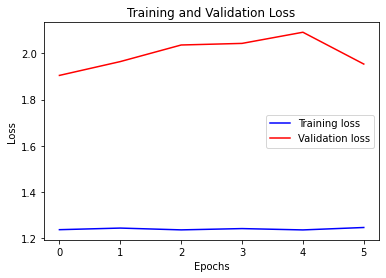

In [32]:
#This block of code visualizes the loss
##CITATION: https://keras.io/examples/timeseries/timeseries_weather_forecasting/
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")


In [33]:
#create sets of numbers such that calculating Macro F1 becomes easier
from statistics import mean
yHat = []
yTrue = []
for x,y in dataset_val:
    yHat.append(model.predict(x))
    yTrue.append(y.numpy())



In [34]:
#create sets of numbers such that calculating Macro F1 becomes easier
yhatter = []
ytruther = []
for i in yHat:
    for x in i:
        
        if x <0:
            yhatter.append(0)
        else:
            yhatter.append(np.floor(x)[0])

for jk in yTrue:
    for xj in jk:
        
        ytruther.append(np.floor(xj))

            
            


In [36]:
#calculate macro F1
import sklearn
from sklearn import metrics
f_macro = sklearn.metrics.f1_score(yhatter, ytruther, average = 'macro')

In [ ]:
#arrays to calculate Macro F1 of a random Strat
aper = []
apex = []

for x,y in dataset_val:
    aper.append(x)
    apex.append(y)

In [ ]:
apere=[]
apexe=[]

for i in apere:
    for y in i:
        apere.append(y)
for i in apexe:
    for y in i:
        apexe.append(y)

In [ ]:
#init the random stratified
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy= "stratified")
dummy_clf.fit(apere, apexe)

In [ ]:
ydummyHat=dummy_clf.predict(apere)

In [ ]:
f_macro1 = sklearn.metrics.f1_score(ydummyHat, apexe, average = 'macro')

In [ ]:
print("f_macro1 random strat",f_macro1)